# Influence Functions (IDNet Padova)

## TODO

pick most prolific user

#### user 16
#### extract the 4000 gait cycles
do K-means clustering on this one user (16 or 25 or 36 clusters)

1. Score of the faux gait cycles

2. comparison between a priori and a posteriori accuracies after removing the bad and good influence gait cycles

In [0]:
np.argmax(np.bincount(y_train))

16

## Examples

In [0]:
#Keras imports

from __future__ import print_function
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import (Dense, Dropout, Activation, Flatten, 
                          Convolution1D, Convolution2D, MaxPooling2D,
                          AveragePooling2D, BatchNormalization)
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import keras
from keras.layers import Conv2D,PReLU,BatchNormalization,Dense,Flatten
from keras.models import Sequential

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'

from keras import backend as K

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#model = load_model('/gdrive/Team Drives/ML/Influence_demos/IDNet.h5')
#model.trainable=False

X_train=np.load('/gdrive/Team Drives/ML/Influence_demos/X_padova_train.npy')
y_train=np.load('/gdrive/Team Drives/ML/Influence_demos/y_padova_train.npy')
X_test=np.load('/gdrive/Team Drives/ML/Influence_demos/X_padova_test.npy')
y_test=np.load('/gdrive/Team Drives/ML/Influence_demos/y_padova_test.npy')

nb_classes=y_train.max()+1
Y_train=keras.utils.to_categorical(y_train, nb_classes)
Y_test=keras.utils.to_categorical(y_test, nb_classes)

def IDNet(nb_classes, input_shape=(1,4,100)):
    model = Sequential()
    model.add(Conv2D(20, (1, 5),padding='valid',kernel_initializer='he_normal', input_shape=input_shape,data_format="channels_first"))
    model.add(PReLU())
    model.add(Conv2D(40, (4,5), padding='same',kernel_initializer='he_normal',activation='tanh'))
    model.add(Flatten())
    model.add(Dense(40,name='features',activation='tanh'))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

e_s=EarlyStopping(monitor='val_acc', min_delta=0, patience=4, verbose=1, mode='auto', baseline=0.95, restore_best_weights=True)
l_r=ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
c_p = ModelCheckpoint(monitor='val_acc',filepath='IDNet.h5', verbose=1, save_best_only=True)

callback_list=[e_s, l_r, c_p]
model=IDNet(nb_classes)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

batch_size=64
n_epochs=50

history=model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,callbacks=callback_list,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 22590 samples, validate on 5648 samples
Epoch 1/50
22590/22590 [==============================] - 6s 264us/step - loss: 1.0115 - acc: 0.7782 - val_loss: 0.3183 - val_acc: 0.9442

Epoch 00001: val_acc improved from -inf to 0.94423, saving model to IDNet.h5
Epoch 2/50
22590/22590 [==============================] - 2s 81us/step - loss: 0.2135 - acc: 0.9605 - val_loss: 0.2373 - val_acc: 0.9419

Epoch 00002: val_acc did not improve from 0.94423
Epoch 3/50
22590/22590 [==============================] - 2s 81us/step - loss: 0.1333 - acc: 0.9721 - val_loss: 0.1350 - val_acc: 0.9731

Epoch 00003: val_acc improved from 0.94423 to 0.97309, saving model to IDNet.h5
Epoch 4/50
22590/22590 [==============================] - 2s 82us/step - loss: 0.1020 - acc: 0.9786 - val_loss: 0.1177 - val_acc: 0.9727

Epoch 00004: val_acc did not improve from 0.97309
Epoch 5/50
22590/2259

In [0]:
y_pred = model.output #Or model.layers[index].output

In [0]:
model.output.shape

TensorShape([Dimension(None), Dimension(38)])

In [0]:
model.loss

<function keras.losses.categorical_crossentropy>

In [0]:
#@title `DarkonLogger` Definition
import logging
from logging.handlers import RotatingFileHandler


class DarkonLogger:
    """ darkon package logger
    """
    def __init__(self):
        _formatter = logging.Formatter('%(asctime)s %(name)s %(levelname)-4s: %(message)s')
        # _file_handler = logging.handler.FileHandler(__package__ + '.log')
        _file_handler = RotatingFileHandler('darkon.log', maxBytes=1024*1024*100)
        _file_handler.setFormatter(_formatter)
        _file_handler.setLevel(logging.DEBUG)
        _stream_handler = logging.StreamHandler()
        _stream_handler.setFormatter(_formatter)
        _stream_handler.setLevel(logging.INFO)

        _logger = logging.getLogger(__package__)
        _logger.setLevel(logging.DEBUG)
        _logger.addHandler(_file_handler)
        _logger.addHandler(_stream_handler)
        self._logger = _logger

        _logger.debug('----------------------------')
        _logger.debug('start logging darkon package')

    @property
    def logger(self):
        return self._logger


logger = DarkonLogger().logger

In [0]:
#@title `InfluenceFeeder` Definition
from __future__ import absolute_import
from __future__ import unicode_literals

import abc
import six


@six.add_metaclass(abc.ABCMeta)
class InfluenceFeeder:
    @abc.abstractmethod
    def reset(self):
        """ reset dataset
        """
        raise RuntimeError('must be implemented')

    @abc.abstractmethod
    def train_batch(self, batch_size):
        """ training data feeder by batch sampling
        Parameters
        ----------
        batch_size : batch size
        Returns
        -------
        xs : feed input values
        ys : feed label values
        """
        raise RuntimeError('must be implemented')

    @abc.abstractmethod
    def train_one(self, index):
        """ single training data feeder
        Parameters
        ----------
        index : training sample index
        Returns
        -------
        x : feed one input value
        y : feed one label value
        """
        raise RuntimeError('must be implemented')

    @abc.abstractmethod
    def test_indices(self, indices):
        """ test data feeder
        Parameters
        ----------
        indices : testing sample index
        Returns
        -------
        x : feed input values
        y : feed label values
        """
        raise RuntimeError('must be implemented')

In [0]:
#@title `MyFeeder` definition

class AccelFeeder(InfluenceFeeder):
    def __init__(self, train_data, train_label, test_data, test_label):
        num_classes = 38
        # input image dimensions
        self.train_origin_data = train_data
        self.train_origin_label = train_label
        # load test data
        self.test_origin_data = test_data
        self.test_origin_label = test_label
        
        self.train_data = train_data
        self.test_data = test_data
        
        self.train_label = train_label
        self.test_label = test_label
        
        self.train_batch_offset = 0

    def test_indices(self, indices):
        return self.test_data[indices], self.test_label[indices]

    def train_batch(self, batch_size):
        # calculate offset
        start = self.train_batch_offset
        end = start + batch_size
        self.train_batch_offset += batch_size

        return self.train_data[start:end, ...], self.train_label[start:end, ...]

    def train_one(self, idx):
        return self.train_data[idx, ...], self.train_label[idx, ...]

    def reset(self):
        self.train_batch_offset = 0

feeder = AccelFeeder(X_train, Y_train, X_test, Y_test)

In [0]:
#@title Initial Imports and `_timing()` definition

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals

import keras
import numpy as np
import tensorflow as tf
from tensorflow.python.ops.gradients_impl import _hessian_vector_product
import time
import os
import time
import hashlib
import json
from functools import wraps

_using_fully_tf = True


def _timing(f):
    @wraps(f)
    def wrap(*args, **kwargs):
        time1 = time.time()
        ret = f(*args, **kwargs)
        time2 = time.time()
        logger.debug('* %s function took [%.3fs]' % (f.__name__, time2-time1))
        return ret
    return wrap

In [0]:
#@title Influence Class (Keras)
kerasLossDict = {
    'categorical_crossentropy': keras.losses.categorical_crossentropy,
    'sparse_categorical_crossentropy': keras.losses.sparse_categorical_crossentropy,
    'binary_crossentropy': keras.losses.binary_crossentropy,
    'kullback_leibler_divergence': keras.losses.kullback_leibler_divergence,
    'poisson': keras.losses.poisson,
    'cosine_proximity': keras.losses.cosine_proximity
}

class Influence:
    """ Influence Class (for keras models)
    """
    def __init__(self, feeder, model):
        self.workspace = './influence-workspace'
        self.feeder = feeder
        self.x_placeholder = model.input
        self.y_placeholder = K.placeholder(shape=model.output.shape)
        self.test_feed_options = dict()
        self.train_feed_options = dict()
        
        if model.loss in kerasLossDict.keys():
            loss_op_train = kerasLossDict[model.loss](self.y_placeholder, model.output)
            loss_op_test = kerasLossDict[model.loss](self.y_placeholder, model.output)
        else:
            loss_op_train = model.loss(self.y_placeholder, model.output)
            loss_op_test = model.loss(self.y_placeholder, model.output)

        trainable_variables = model.trainable_weights

        self.loss_op_train = loss_op_train
        self.grad_op_train = K.gradients(loss_op_train, trainable_variables)
        self.grad_op_test = K.gradients(loss_op_test, trainable_variables)

        self.v_cur_estimated = [tf.placeholder(tf.float32, shape=a.get_shape()) for a in trainable_variables]
        self.v_test_grad = [tf.placeholder(tf.float32, shape=a.get_shape()) for a in trainable_variables]
        self.v_ihvp = tf.placeholder(tf.float64, shape=[None])
        self.v_param_damping = tf.placeholder(tf.float32)
        self.v_param_scale = tf.placeholder(tf.float32)
        self.v_param_total_trainset = tf.placeholder(tf.float64)

        self.inverse_hvp = None
        self.trainable_variables = trainable_variables

        with tf.name_scope('darkon_ihvp'):
            self.hessian_vector_op = _hessian_vector_product(loss_op_train, trainable_variables, self.v_cur_estimated)
            self.estimation_op = [
                a + (b * self.v_param_damping) - (c / self.v_param_scale)
                for a, b, c in zip(self.v_test_grad, self.v_cur_estimated, self.hessian_vector_op)
            ]

        with tf.name_scope('darkon_grad_diff'):
            flatten_inverse_hvp = tf.reshape(self.v_ihvp, shape=(-1, 1))
            flatten_grads = tf.concat([tf.reshape(a, (-1,)) for a in self.grad_op_train], 0)
            flatten_grads = tf.reshape(flatten_grads, shape=(1, -1,))
            flatten_grads = tf.cast(flatten_grads, tf.float64)
            flatten_grads /= self.v_param_total_trainset
            self.grad_diff_op = tf.matmul(flatten_grads, flatten_inverse_hvp)

        self.ihvp_config = {
            'scale': 1e4,
            'damping': 0.01,
            'num_repeats': 1,
            'recursion_batch_size': 10,
            'recursion_depth': 10000
        }

        if not os.path.exists(self.workspace):
            os.makedirs(self.workspace)


    @_timing
    def upweighting_influence(self, sess, test_indices, test_batch_size, approx_params,
                              train_indices, num_total_train_example, force_refresh=False):
        """ Calculate influence score of given training samples that affect on the test samples
         Negative value indicates bad effect on the test loss
        """
        self._prepare(sess, test_indices, test_batch_size, approx_params, force_refresh)

        self.feeder.reset()
        score = self._grad_diffs(sess, train_indices, num_total_train_example)
        logger.info('Multiplying by %s train examples' % score.size)
        return score


    @_timing
    def upweighting_influence_batch(self, sess, test_indices, test_batch_size, approx_params,
                                    train_batch_size, train_iterations, subsamples=-1, force_refresh=False):
        """ Iteratively calculate influence scores for training data sampled by batch sampler
        Negative value indicates bad effect on the test loss
        """
        self._prepare(sess, test_indices, test_batch_size, approx_params, force_refresh)

        self.feeder.reset()
        score = self._grad_diffs_all(sess, train_batch_size, train_iterations, subsamples)
        logger.info('Multiplying by %s train examples' % score.size)
        return score


    @_timing
    def _prepare(self, sess, test_indices, test_batch_size, approx_params, force_refresh):
        """ Calculate inverse hessian vector product, and save it in workspace
        """
        # update ihvp approx params
        if approx_params is not None:
            for param_key in approx_params.keys():
                if param_key not in self.ihvp_config:
                    raise RuntimeError('unknown ihvp config param is approx_params')
            self.ihvp_config.update(approx_params)

        inv_hvp_path = self._path(self._approx_filename(sess, test_indices))
        if not os.path.exists(inv_hvp_path) or force_refresh:
            self.feeder.reset()
            test_grad_loss = self._get_test_grad_loss(sess, test_indices, test_batch_size)
            logger.info('Norm of test gradient: %s' % np.linalg.norm(np.concatenate([a.reshape(-1) for a in test_grad_loss])))
            self.inverse_hvp = self._get_inverse_hvp_lissa(sess, test_grad_loss)
            np.savez(inv_hvp_path, inverse_hvp=self.inverse_hvp, encoding='bytes')
            logger.info('Saved inverse HVP to %s' % inv_hvp_path)
        else:
            self.inverse_hvp = np.load(inv_hvp_path, encoding='bytes')['inverse_hvp']
            logger.info('Loaded inverse HVP from %s' % inv_hvp_path)


    def _get_test_grad_loss(self, sess, test_indices, test_batch_size):
        if test_indices is not None:
            num_iter = int(np.ceil(len(test_indices) / test_batch_size))
            test_grad_loss = None
            for i in range(num_iter):
                start = i * test_batch_size
                end = int(min((i + 1) * test_batch_size, len(test_indices)))
                size = float(end - start)

                test_feed_dict = self._make_test_feed_dict(*self.feeder.test_indices(test_indices[start:end]))
                temp = sess.run(self.grad_op_test, feed_dict=test_feed_dict)
                temp = np.asarray(temp)

                temp *= size
                if test_grad_loss is None:
                    test_grad_loss = temp
                else:
                    test_grad_loss += temp

            test_grad_loss /= len(test_indices)
        else:
            raise RuntimeError('unsupported yet')
        return test_grad_loss

    
    def _approx_filename(self, sess, test_indices):
        sha = hashlib.sha1()

        # weights
        vs = sess.run(self.trainable_variables)
        for a in vs:
            sha.update(a.data)

        # test_indices
        np_test_indices = np.array(list(test_indices))
        sha.update(np_test_indices.data)

        # approx_params
        sha.update(json.dumps(self.ihvp_config, sort_keys=True).encode('utf-8'))
        return 'ihvp.' + sha.hexdigest() + '.npz'

    
    def _get_inverse_hvp_lissa(self, sess, test_grad_loss):
        ihvp_config = self.ihvp_config
        print_iter = ihvp_config['recursion_depth'] / 10

        inverse_hvp = None
        for sample_idx in range(ihvp_config['num_repeats']):
            cur_estimate = test_grad_loss
            debug_diffs_estimation = [] ## FOR DEBUGGING
            prev_estimation_norm = np.linalg.norm(np.concatenate([a.reshape(-1) for a in cur_estimate])) ## FOR DEBUGGING

            for j in range(ihvp_config['recursion_depth']):
                train_batch_data, train_batch_label = self.feeder.train_batch(ihvp_config['recursion_batch_size'])
                feed_dict = self._make_train_feed_dict(train_batch_data, train_batch_label)
                feed_dict = self._update_feed_dict(feed_dict, cur_estimate, test_grad_loss)

                if _using_fully_tf:
                    feed_dict.update({
                        self.v_param_damping: 1 - self.ihvp_config['damping'],
                        self.v_param_scale: self.ihvp_config['scale']
                    })
                    cur_estimate = sess.run(self.estimation_op, feed_dict=feed_dict)
                else:
                    hessian_vector_val = sess.run(self.hessian_vector_op, feed_dict=feed_dict)
                    hessian_vector_val = np.array(hessian_vector_val)
                    cur_estimate = test_grad_loss + (1 - ihvp_config['damping']) * cur_estimate - hessian_vector_val / ihvp_config['scale']

                curr_estimation_norm = np.linalg.norm(np.concatenate([a.reshape(-1) for a in cur_estimate])) ## FOR DEBUGGING
                debug_diffs_estimation.append(curr_estimation_norm - prev_estimation_norm) ## FOR DEBUGGING
                prev_estimation_norm = curr_estimation_norm ## FOR DEBUGGING
                
                if (j % print_iter == 0) or (j == ihvp_config['recursion_depth'] - 1):
                    logger.info("Recursion at depth %s: norm is %.8lf" %
                                (j, np.linalg.norm(np.concatenate([a.reshape(-1) for a in cur_estimate]))))

            if inverse_hvp is None:
                inverse_hvp = np.array(cur_estimate) / ihvp_config['scale']
            else:
                inverse_hvp += np.array(cur_estimate) / ihvp_config['scale']

            np.savetxt(self._path('debug_diffs_estimation_{}.txt'.format(sample_idx)), debug_diffs_estimation) ## FOR DEBUGGING

        inverse_hvp /= ihvp_config['num_repeats']
        return inverse_hvp

    
    def _update_feed_dict(self, feed_dict, cur_estimated, test_grad_loss):
        for placeholder, var in zip(self.v_cur_estimated, cur_estimated):
            feed_dict[placeholder] = var

        for placeholder, var in zip(self.v_test_grad, test_grad_loss):
            feed_dict[placeholder] = var
        return feed_dict

    
    @_timing
    def _grad_diffs(self, sess, train_indices, num_total_train_example):
        inverse_hvp = np.concatenate([a.reshape(-1) for a in self.inverse_hvp])

        num_to_remove = len(train_indices)
        predicted_grad_diffs = np.zeros([num_to_remove])

        for counter, idx_to_remove in enumerate(train_indices):
            single_data, single_label = self.feeder.train_one(idx_to_remove)
            feed_dict = self._make_train_feed_dict([single_data], [single_label])
            predicted_grad_diffs[counter] = self._grad_diff(sess, feed_dict, num_total_train_example, inverse_hvp)

            if (counter % 1000) == 0:
                logger.info('counter: {} / {}'.format(counter, num_to_remove))

        return predicted_grad_diffs

    
    @_timing
    def _grad_diffs_all(self, sess, train_batch_size, num_iters, num_subsampling):
        num_total_train_example = num_iters * train_batch_size
        if num_subsampling > 0:
            num_diffs = num_iters * num_subsampling
        else:
            num_diffs = num_iters * train_batch_size

        inverse_hvp = np.concatenate([a.reshape(-1) for a in self.inverse_hvp])
        predicted_grad_diffs = np.zeros([num_diffs])

        counter = 0
        for it in range(num_iters):
            train_batch_data, train_batch_label = self.feeder.train_batch(train_batch_size)

            if num_subsampling > 0:
                for idx in range(num_subsampling):
                    feed_dict = self._make_train_feed_dict(train_batch_data[idx:idx + 1], train_batch_label[idx:idx + 1])
                    predicted_grad_diffs[counter] = self._grad_diff(sess, feed_dict, num_total_train_example, inverse_hvp)
                    counter += 1
            else:
                for single_data, single_label in zip(train_batch_data, train_batch_label):
                    feed_dict = self._make_train_feed_dict([single_data], [single_label])
                    predicted_grad_diffs[counter] = self._grad_diff(sess, feed_dict, num_total_train_example, inverse_hvp)
                    counter += 1

            if (it % 10) == 0:
                logger.info('iter: {}/{}'.format(it, num_iters))

        return predicted_grad_diffs

    
    def _grad_diff(self, sess, feed_dict, num_total_train_example, inverse_hvp):
        if _using_fully_tf:
            feed_dict.update({
                self.v_ihvp: inverse_hvp,
                self.v_param_total_trainset: num_total_train_example
            })
            return sess.run(self.grad_diff_op, feed_dict=feed_dict)
        else:
            train_grads = sess.run(self.grad_op_train, feed_dict=feed_dict)
            train_grads = np.concatenate([a.reshape(-1) for a in train_grads])
            train_grads /= num_total_train_example
            return np.dot(inverse_hvp, train_grads)

        
    def _make_test_feed_dict(self, xs, ys):
        ret = {
            self.x_placeholder: xs,
            self.y_placeholder: ys,
        }
        ret.update(self.test_feed_options)
        return ret

    
    def _make_train_feed_dict(self, xs, ys):
        ret = {
            self.x_placeholder: xs,
            self.y_placeholder: ys,
        }
        ret.update(self.train_feed_options)
        return ret

    
    def _path(self, *paths):
        return os.path.join(self.workspace, *paths)

In [0]:
#@title Inspector definition

inspector = Influence(
    feeder=feeder,
    model=model)

In [0]:
int(len(X_train)/64)

352

In [0]:
#@title Influence Target & Params

#@markdown The index of the (single) influence target
influence_target = 99

# display
print([int(np.argmax(feeder.test_origin_label[influence_target]))])
#plt.imshow(feeder.test_origin_data[influence_target])

#test_indices = [influence_target]
test_indices = np.arange(0,len(feeder.test_origin_data))
testset_batch_size = 100 #@param {type:"integer"}

train_batch_size = 64 #@param {type:"integer"}
train_iterations = 352 #@param {type:"integer"}

sess = tf.InteractiveSession()

#@markdown **Parameters for the influence function approximator itself:**
scale = 1e5   #@param 
#@markdown Lower **`scale`** makes scores more exaggerated, higher does opposite
#@markdown (Too high can get nan norms, which results in random indexes and non-plottable scores)
damping = 0.01 #@param 
num_repeats = 1 #@param 
recursion_batch_size = 100 #@param 
recursion_depth = 10000 #@param 


approx_params = {
    'scale': scale,   # lower makes scores more exaggerated, higher does opposite (but too high can get nan norms, which results in random indexes and non-plottable scores)
    'damping': damping,
    'num_repeats': num_repeats,
    'recursion_batch_size': recursion_batch_size,
    'recursion_depth': recursion_depth
}

[16]


In [0]:
#@title Default title text
tf.initialize_all_variables().run()

scores = inspector.upweighting_influence_batch(
    sess,
    test_indices,
    testset_batch_size,
    approx_params,
    train_batch_size,
    train_iterations)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


2019-05-31 22:28:43,020 tensorflow WARNING: From /usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
2019-05-31 22:28:43,540 root INFO: Norm of test gradient: 1177.6475
2019-05-31 22:28:43,620 root INFO: Recursion at depth 0: norm is 2264.70263672
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:192: RuntimeWarning: invalid value encountered in float_scalars
2019-05-31 22:28:49,721 root INFO: Recursion at depth 1000: norm is 10183943877786861568.00000000
2019-05-31 22:28:54,573 root INFO: Recursion at depth 2000: norm is 439657582034944.00000000
2019-05-31 22:28:59,424 root INFO: Recursion at depth 3000: norm is 18980751360.00000000
2019-05-31 22:29:04,277 root INFO: Recursion at depth 4000: norm is 831436.62500000
2019-05-31 22:29:09,105 root INFO: Recurs

In [0]:
sorted_indices = np.argsort(scores)
harmful = sorted_indices[:10]
helpful = sorted_indices[-10:][::-1]

print('\nHarmful:')
for idx in harmful:
    print('[{}] {}'.format(idx, scores[idx]))
    
print('\nHelpful:')
for idx in helpful:
    print('[{}] {}'.format(idx, scores[idx]))


Harmful:
[14659] -0.0009486683952730187
[3951] -0.0009231147059655751
[11233] -0.0009064619344130523
[6006] -0.0008773985646519832
[13297] -0.0008620250901938918
[294] -0.0008412323385834256
[8239] -0.0008349154931654289
[12933] -0.0008272923299348495
[21888] -0.0008248883598722392
[20331] -0.0008205940044482038

Helpful:
[21052] 0.0028179470751402333
[15851] 0.002728036545831599
[7005] 0.0026950649470931396
[16821] 0.002690768394540767
[151] 0.002670083266083573
[10845] 0.0026657270665420185
[13285] 0.0026454567696449797
[3051] 0.0026359353442296416
[76] 0.00263308608453092
[11309] 0.002624899973863403


### Most "helpful" data

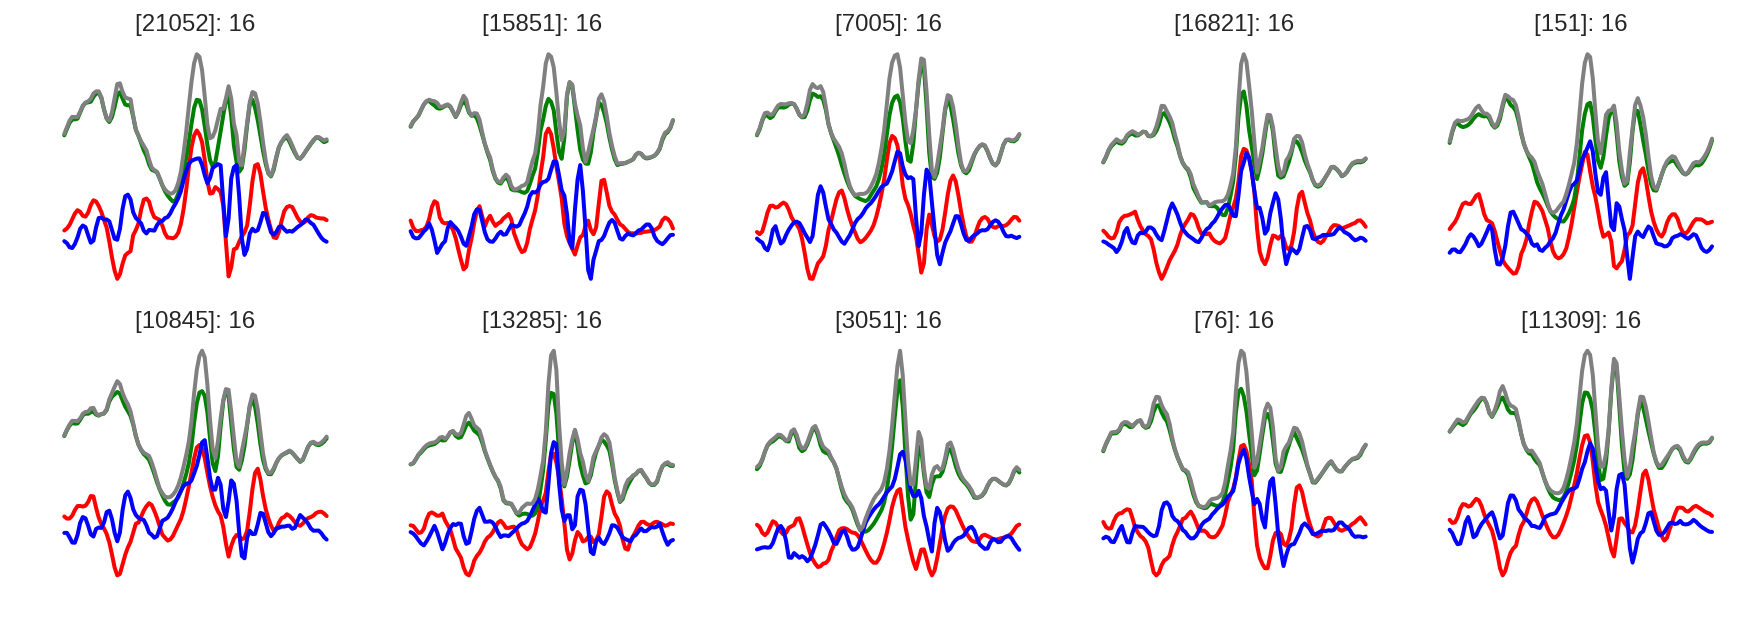

In [0]:
fig, axes1 = plt.subplots(2, 5, figsize=(15, 5))
target_idx = 0
for j in range(2):
    for k in range(5):
        idx = helpful[target_idx]
        axes1[j][k].set_axis_off()
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][0], color='red', linewidth=2)
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][1], color='green', linewidth=2)
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][2], color='blue', linewidth=2)
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][3], color='gray', linewidth=2)
        label_str = int(np.argmax(feeder.train_origin_label[idx]))
        axes1[j][k].set_title('[{}]: {}'.format(idx, label_str))

        target_idx += 1

### Most "harmful" data

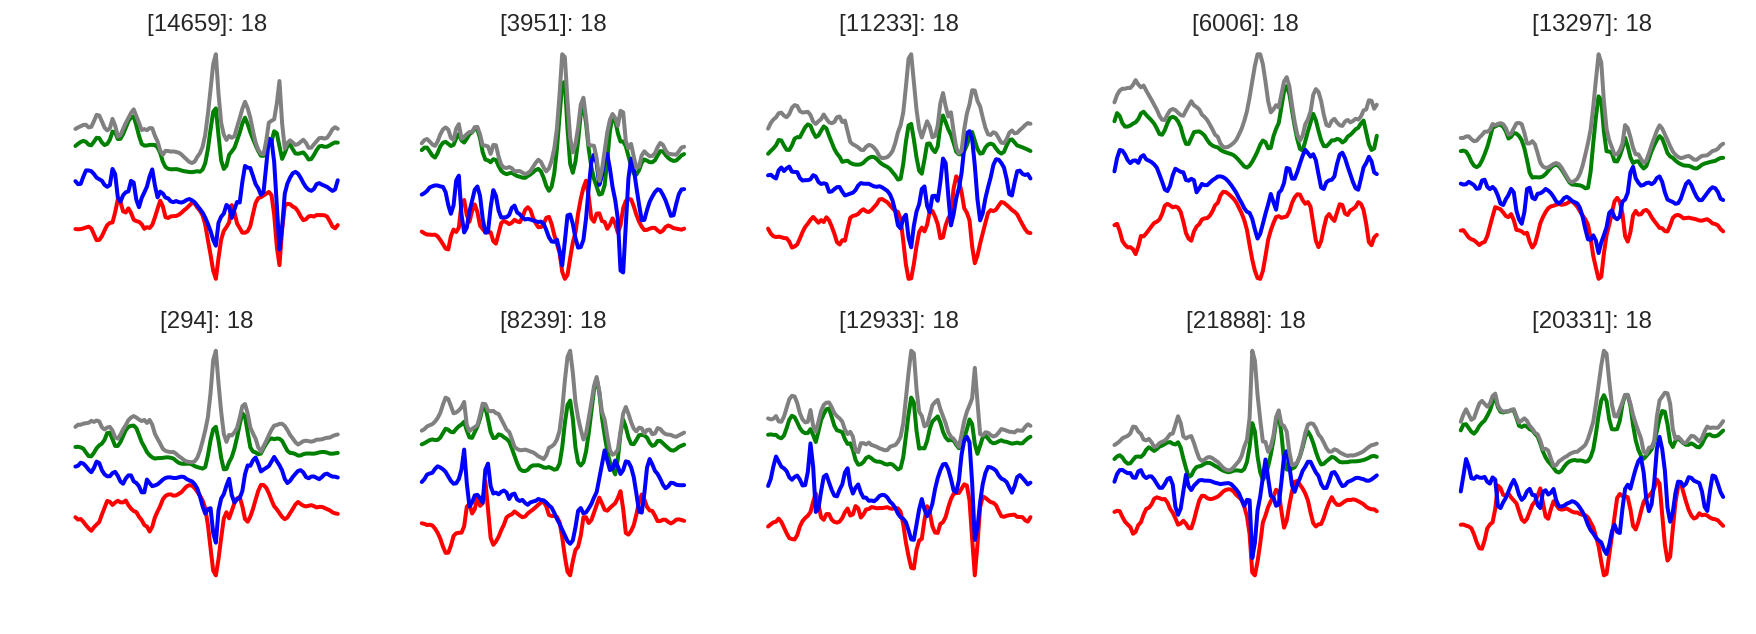

In [0]:
fig, axes1 = plt.subplots(2, 5, figsize=(15, 5))
target_idx = 0
for j in range(2):
    for k in range(5):
        idx = harmful[target_idx]
        axes1[j][k].set_axis_off()
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][0], color='red', linewidth=2)
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][1], color='green', linewidth=2)
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][2], color='blue', linewidth=2)
        axes1[j][k].plot(np.arange(100), feeder.train_origin_data[idx][0][3], color='gray', linewidth=2)
        label_str = int(np.argmax(feeder.train_origin_label[idx]))
        axes1[j][k].set_title('[{}]: {}'.format(idx, label_str))

        target_idx += 1

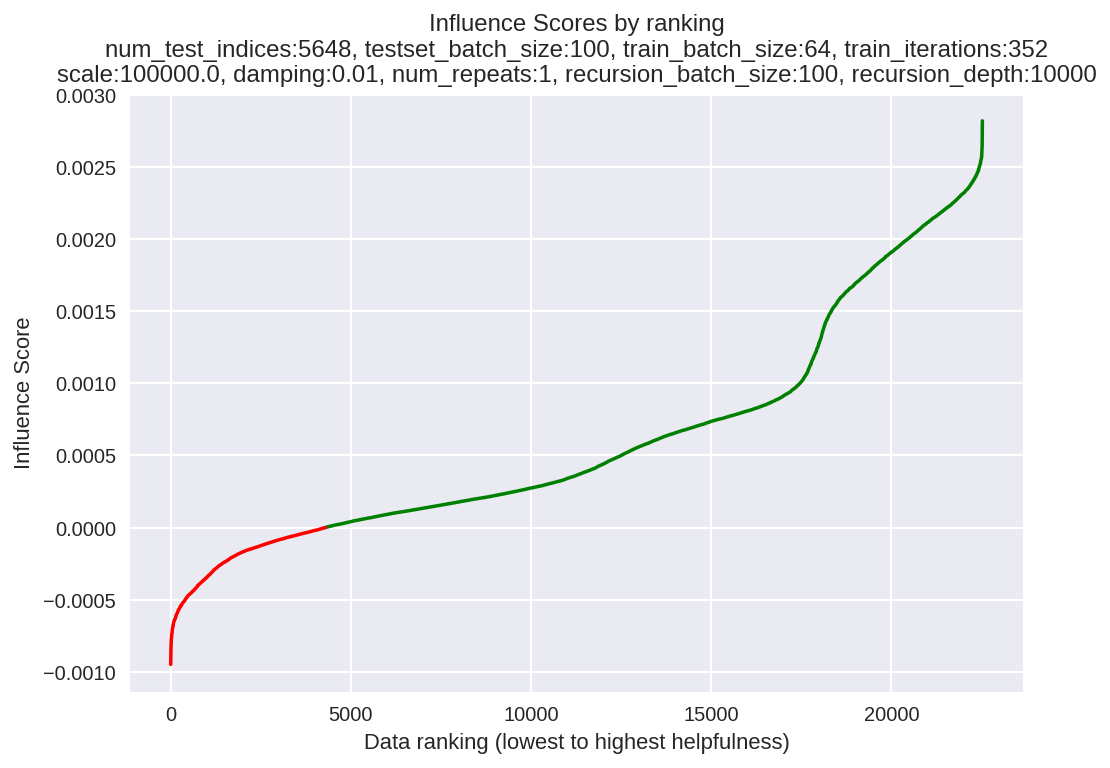

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

pos_signal = scores[sorted_indices].copy()
neg_signal = scores[sorted_indices].copy()

pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

#plotting
plt.style.use('seaborn')
plt.plot(pos_signal, color='g')
plt.plot(neg_signal, color='r')
plt.xlabel("Data ranking (lowest to highest helpfulness)")
plt.ylabel("Influence Score")
plt.title("Influence Scores by ranking\nnum_test_indices:{}, testset_batch_size:{}, train_batch_size:{}, train_iterations:{}\nscale:{}, damping:{}, num_repeats:{}, recursion_batch_size:{}, recursion_depth:{}".format(
    len(test_indices),
    testset_batch_size,
    train_batch_size,
    train_iterations,
    approx_params['scale'],
    approx_params['damping'],
    approx_params['num_repeats'],
    approx_params['recursion_batch_size'],
    approx_params['recursion_depth']))
plt.savefig('pos_neg.png', dpi=1000)
plt.show()

In [0]:
import pandas as pd

influence_results = pd.DataFrame(
    data=np.transpose(
        np.stack(
            [scores[sorted_indices],
             [i.astype(int) for i in sorted_indices],
             [i.astype(int) for i in np.argmax(feeder.train_origin_label[sorted_indices], axis=1)],
             np.arange(len(scores),0,-1),
             np.arange(1,len(scores)+1,1)
            ])),
    columns=["score", "index", "label", "pos_rank", "neg_rank"])

In [0]:
#@title Plotting functions for interactive visualization
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.models import (
    ColumnDataSource,
    ColorBar,
    LinearColorMapper,
    LogColorMapper,
)
from bokeh.models.annotations import BoxAnnotation
from bokeh.models.tools import HoverTool
from bokeh.palettes import Viridis3, Viridis256
from bokeh.plotting import figure
from bokeh.transform import transform

output_notebook()

# Create a ColumnDataSource from df: source
source = ColumnDataSource(influence_results)

TOOLS = "box_select,lasso_select,help,pan,wheel_zoom,box_zoom,reset"
TITLE = "Influence scores for training data (colored and ordered by helpfulness)"

p = figure(tools=TOOLS, toolbar_location="above",
           plot_width=800, plot_height=400, title=TITLE)
p.toolbar.logo = "normal"

color_mapper = LinearColorMapper(palette=Viridis256, 
                                 low=np.min(influence_results['score'].values), 
                                 high=np.max(influence_results['score'].values))
#color_mapper.low_color = 'red'
#color_mapper.high_color = 'red'

# region that always fills the top of the plot
upper = BoxAnnotation(bottom=0, fill_alpha=0.025, fill_color='green')
p.add_layout(upper)

# region that always fills the bottom of the plot
lower = BoxAnnotation(top=0, fill_alpha=0.025, fill_color='firebrick')
p.add_layout(lower)

color_bar = ColorBar(color_mapper=color_mapper, location=(0,0))
p.add_layout(color_bar, 'right')

# add a circle renderer with x and y coordinates, size, color, and alpha
cr = p.circle('index', 'score', size=5,
              fill_color={'field': 'score', 'transform': color_mapper}, 
              hover_fill_color="orange",
              line_color={'field': 'score', 'transform': color_mapper}, 
              hover_line_color="orange",
              fill_alpha=1.0, hover_fill_alpha=1.0, source=source)

p.add_tools(HoverTool(tooltips=[("score", "@score"),
                                ('index', '@index'),
                                ("label", "@label"),
                                ('pos_rank', '@pos_rank'),
                                ("neg_rank", "@neg_rank")],
                      renderers=[cr],
                      mode='mouse'))

p.outline_line_width = 3
p.outline_line_alpha = 0.15
p.outline_line_color = "navy"
p.xaxis.axis_label = 'Index (unranked)'
p.yaxis.axis_label = 'Influence Score'

show(p)

Loading BokehJS ...

In [0]:
#@title Organizing indexes by rank

output_notebook()

# Create a ColumnDataSource from df: source
source = ColumnDataSource(influence_results)

TOOLS = "box_select,lasso_select,help,pan,wheel_zoom,box_zoom,reset"
TITLE = "Influence scores for training data (colored and ordered by helpfulness)"

p = figure(tools=TOOLS, toolbar_location="above",
           plot_width=800, plot_height=400, title=TITLE)
p.toolbar.logo = "normal"

color_mapper = LinearColorMapper(palette=Viridis256, 
                                 low=np.min(influence_results['score'].values), 
                                 high=np.max(influence_results['score'].values))
#color_mapper.low_color = 'red'
#color_mapper.high_color = 'red'

# region that always fills the top of the plot
upper = BoxAnnotation(bottom=0, fill_alpha=0.025, fill_color='green')
p.add_layout(upper)

# region that always fills the bottom of the plot
lower = BoxAnnotation(top=0, fill_alpha=0.025, fill_color='firebrick')
p.add_layout(lower)

color_bar = ColorBar(color_mapper=color_mapper, location=(0,0))
p.add_layout(color_bar, 'right')

# add a circle renderer with x and y coordinates, size, color, and alpha
cr = p.circle('neg_rank', 'score', size=5,
              fill_color={'field': 'score', 'transform': color_mapper}, 
              hover_fill_color="orange",
              line_color={'field': 'score', 'transform': color_mapper}, 
              hover_line_color="orange",
              fill_alpha=1.0, hover_fill_alpha=1.0, source=source)

p.add_tools(HoverTool(tooltips=[("score", "@score"),
                                ('index', '@index'),
                                ("label", "@label"),
                                ('pos_rank', '@pos_rank'),
                                ("neg_rank", "@neg_rank")],
                      renderers=[cr],
                      mode='mouse'))

p.outline_line_width = 3
p.outline_line_alpha = 0.15
p.outline_line_color = "navy"
p.xaxis.axis_label = 'Ranked Index (1=lowest score)'
p.yaxis.axis_label = 'Influence Score'

show(p)

Loading BokehJS ...